#Prompt Engineer Internship Test Assignment: Personal Data Masking

## Introduction
Welcome to the Prompt Engineer Internship Test Assignment! Your main task is to **create a system that efficiently masks personal data in text using the `gpt-3.5-turbo` model via the OpenAI API**. You'll replace personal information with a `[PERSONAL]` placeholder, aiming to achieve the most effective masking possible.

This assignment will give you hands-on experience with:

* Working with the OpenAI API
* Prompt engineering for specific tasks
* Fine-tuning model outputs through prompt and parameter adjustments

Your goal is to experiment with various prompts and parameters to find the optimal configuration for personal data masking.

> **Important:** Before you begin, make a copy of this notebook for your personal use. Click on "File" -> "Save a copy in Drive" in the Google Colab menu. This will create a new copy in your Google Drive. Use this copy to complete the assignment. When you're finished, ensure you've shared your completed notebook with appropriate permissions for review.

## Setup
First, let's set up our environment:


In [1]:
!pip install openai

Now, import the required modules:

In [2]:
import os
from openai import OpenAI

### Setting up the OpenAI API Key
Before proceeding with the assignment, you'll need to obtain an OpenAI API key. This key is essential for authenticating your requests to the OpenAI API. Here's how to get started:

1. Go to https://platform.openai.com/signup
1. Click on "Sign up" and follow the registration process
1. Once logged in, navigate to the https://platform.openai.com/api-keys
1. You may need to provide additional information or verify your account
1. Generate a new key and make sure to copy it immediately (you won't be able to see it again)
1. New accounts typically receive $5 of free credit from OpenAI. This should be sufficient for completing this assignment

> **Important:** If you're unable to obtain an API key for any reason, please contact us immediately. We have a backup option to provide you with a temporary API key for the duration of this assignment.

> **Security Warning:** Your API key is sensitive information. Never share it publicly or commit it to version control systems.

After obtaining your API key, you'll use it in the code as shown in the next section. Remember to replace 'your-api-key-here' with your actual API key.

In [3]:
# Set your OpenAI API key here
os.environ['OPENAI_API_KEY'] = 'set_your'

## Basic API Interaction

In the context of using the OpenAI API, we need to understand how to structure our requests:

* `system_prompt`: This sets the overall context or instructions for the model. It's like giving the model its role or job description.
* `user_prompt`: This contains the specific input or task for the model to process. In our case, it will contain the text to be masked.
* `temperature`: Controls randomness in the output. Lower values (e.g., 0.1) make the output more deterministic, while higher values introduce more randomness.
* `max_tokens`: The maximum number of tokens the model will generate.

Let's set up the initial prompts and try to mask personal data in this wedding invitation:

In [ ]:
client = OpenAI()

system_prompt = "Replace personal data in the text below with the [PERSONAL] placeholder."

# Sample text to mask
user_prompt = """
INVITATION

You are cordially invited to celebrate the wedding of
Emma Louise Parker
&
Christopher James Dawson

Date: August 15, 2023
Time: 3:00 PM
Venue: Rosewood Gardens, 1515 Rose Lane, Sunnyville

RSVP by July 1st to emmaandchris@lovebirds.com or 555-789-0123
Reception to follow at Sunnyville Grand Hotel
Book your stay using code DAWSON23 for a special rate

Wedding registry: www.weddingwishes.com/EmmaAndChris
""".strip()

# Make the API call
completion = client.chat.completions.create(
    model="gpt-3.5-turbo", # Please use the "gpt-3.5-turbo" model only
    messages=[
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
    ],
    temperature=1,
    max_tokens=1024
)

# Print the results
print("Masked Text:")
print(completion.choices[0].message.content)

Masked Text:
INVITATION

You are cordially invited to celebrate the wedding of
[PERSONAL]
&
[PERSONAL]

Date: August 15, 2023
Time: 3:00 PM
Venue: Rosewood Gardens, 1515 Rose Lane, Sunnyville

RSVP by July 1st to emmaandchris@lovebirds.com or 555-789-0123
Reception to follow at Sunnyville Grand Hotel
Book your stay using code DAWSON23 for a special rate

Wedding registry: www.weddingwishes.com/EmmaAndChris


> **Think about it:** How does the structure of `system_prompt` and `user_prompt` affect the model's understanding of the task? What types of personal information should be masked in this context?

## Your Task: Develop an Advanced Personal Data Masking

Now that you've seen a basic example, your task is to develop a more advanced masking system using the `gpt-3.5-turbo` model. Your system should be able to handle various types of documents and effectively mask different kinds of personal information.
Here are the key aspects you need to consider:

1. **Prompt Engineering:** Experiment with different system and user messages to improve masking accuracy. Consider what specific instructions might help the model identify and replace all types of personal information.

1. **Parameter Tuning:** Explore how different parameters like `temperature`, `max_tokens`, or even `top_p`, `frequency_penalty`, and `presence_penalty` affect the output. Find the optimal balance for consistent and accurate masking. See the parameters explanation in the OpenAI API reference: https://platform.openai.com/docs/api-reference/chat/create

1. **Handling Different Document Types:** Your system should be able to mask various document types, such as:
  * Resumes/CVs
  * Email correspondences
  * Medical records
  * Social media posts
  * News articles
  * etc.

1. **Edge Cases:** Consider how your system might handle edge cases, such as:
  * Names that are also common words
  * Addresses with non-standard formats
  * Indirect personal references

## Evaluation Criteria
Your masking system will be evaluated based on the following criteria:
1. Accuracy of masking across different types of personal information
1. Diversity and creativity of identified input scenarios and personal data types
1. Handling of edge cases and challenging scenarios
1. Creativity and effectiveness of prompt engineering
1. Thoughtfulness of parameter choices and their justification

## Expected Output
Your final submission should include:

1. The complete notebook with your final, optimized version of the code, including:
  * The most effective system prompt and user prompt you developed
  * The optimal configuration parameters you found
  * Any additional functions or modifications you made to improve masking
1. A brief reflection and analysis addressing the following points:
  * What combination of prompts and parameters yielded the best results? Why do you think this configuration was most effective?
  * What were the main challenges in achieving consistent masking across different types of text?
  * Imagine you need to evaluate 100 different personal data masking systems like yours, each tested on 100 diverse input documents. How would you design an automated evaluation process to efficiently compare and rank these systems? What methods or techniques would you consider to efficiently assess the performance of these various personal data masking systems?
1. Enumeration of the input scenarios and personal data types you considered, including non-obvious cases

> **Important:** Ensure that your notebook is runnable and reproducible. Before submitting, click the "Share" button in the top-right corner, set the access to "Anyone with the link" and permissions to "Viewer". Copy the sharing link and include it with your submission. This allows reviewers to access your final work.

## Time Management
While there is no strict deadline, we recommend allocating approximately 4-6 hours for this assignment. This should allow sufficient time for experimentation, analysis, and reflection.

## Conclusion
This assignment tasks you with building a personal data masking system using the GPT-3.5-turbo model. You'll be working directly with the OpenAI API, crafting prompts, and developing strategies to handle various types of personal information across different document formats.

While the core task is clear, the implementation is open-ended. We're interested in your approach to prompt engineering, your creativity in generating diverse evaluation cases, and your insights into the strengths and limitations of LLM-based data processing. We're curious to see your solution.

# Solutions


## Experiments

In [ ]:
import os
from openai import OpenAI

client = OpenAI()

def mask_personal_data(text, system_prompt, temperature=0.1, max_tokens=1024):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": text}
        ],
        temperature=temperature,
        max_tokens=max_tokens,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    return completion.choices[0].message.content

#
system_prompt = """
You are a personal data masking expert.  Your task is to replace all instances of
personal information within the given text with the placeholder "[PERSONAL]".

Personal information includes but isn't limited to:
* Names (full names, partial names, initials)
* Email addresses
* Phone numbers
* Addresses (street addresses, PO Boxes, cities, states, zip codes, countries)
* Dates of birth
* Social Security numbers
* Credit card numbers
* Bank account numbers
* Medical records and health information
* IP addresses
* URLs that might contain personal information
* Vehicle identification numbers (VINs)
* Driver's license numbers
* Passport numbers
* Any other unique identifiers associated with a person.

Be thorough and replace all forms of personal data.  Consider context.
For example, if a name appears as part of a company name, do not mask it.
If a number is used as part of a quantity, do not mask it.  Handle different document types appropriately.
Replace only the personal data; preserve the original text's formatting and structure as much as possible.
Pay attention to addresses with non-standard formats, names that are also common words and indirect personal references.
"""


# Sample
resume = """
John Doe
123 Main St, Anytown, CA 91234
(555) 555-5555
john.doe@email.com
... (resume content) ...
"""
email = """
Subject: Meeting
From: jane.doe@email.com
To: john.doe@email.com
Hi John,
... (email content) ...
"""

# Test the improved masking
masked_resume = mask_personal_data(resume, system_prompt)
print("Masked Resume:\n", masked_resume)

masked_email = mask_personal_data(email, system_prompt)
print("\nMasked Email:\n", masked_email)


#Further examples with other document types
medical_record = """Patient Name: Jane Doe, DOB: 01/01/1980, Address: 456 Oak Ave, Anytown, CA 91234, Diagnosis: ..."""
social_media_post = """My name is Alice Smith, and I live in New York.  My phone number is 123-456-7890."""

masked_medical_record = mask_personal_data(medical_record, system_prompt)
print("\nMasked Medical Record:\n", masked_medical_record)

masked_social_media_post = mask_personal_data(social_media_post, system_prompt)
print("\nMasked Social Media Post:\n", masked_social_media_post)

Masked Resume:
 [PERSONAL]
[PERSONAL]
[PERSONAL]
[PERSONAL]
... (resume content) ...

Masked Email:
 Subject: Meeting
From: [PERSONAL]
To: [PERSONAL]
Hi [PERSONAL],
... (email content) ...

Masked Medical Record:
 Patient Name: [PERSONAL], DOB: [PERSONAL], Address: [PERSONAL], Diagnosis: ...

Masked Social Media Post:
 My name is [PERSONAL], and I live in [PERSONAL].  My phone number is [PERSONAL].


In [ ]:
client = OpenAI()

def mask_personal_data(text, system_prompt, temperature=0.1, max_tokens=1024):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": text}
        ],
        temperature=temperature,
        max_tokens=max_tokens
    )
    return completion.choices[0].message.content


# Advanced system prompt with detailed instructions
system_prompt = """
You are a personal data masking expert. Your task is to meticulously replace all instances of personally identifiable information (PII) within a given text with the placeholder "[PERSONAL]".

PII includes, but isn't limited to:
* Names (full names, first names, last names, initials)
* Email addresses
* Phone numbers
* Physical addresses (street addresses, city, state, zip code, country)
* Dates of birth
* Social security numbers
* Credit card numbers
* Bank account numbers
* Passport numbers
* Driver's license numbers
* Medical record numbers
* IP addresses
* URLs containing personal information
* Usernames
* Vehicle identification numbers (VINs)
* Any other unique identifiers linked to an individual

Your masking should be comprehensive and accurate, even for indirect references or slightly altered forms of PII.
Treat names that are also common words as PII if they appear in a context that suggests personal identification.
Address non-standard address formats or indirect references carefully.
Do not mask common words that happen to resemble names, unless they are part of a phrase or sentence that clearly identifies a person.
Maintain the original structure and formatting of the text as much as possible.  Only replace the PII itself with "[PERSONAL]".
"""

# Example usage with different documents
documents = [
    """
    My name is John Doe and my email is john.doe@example.com.
    I live at 123 Main St, Anytown, CA 91234.  My phone number is 555-123-4567
    """,
    """
    Patient Name: Jane Smith, DOB: 01/01/1980, Medical Record Number: 1234567.
    """,
    """
    Resume for Alice Johnson.  Skills: Python, Java, Data Science.  Email: alice@example.net.  Phone: (123) 456-7890.  GitHub: github.com/alicejohnson.  LinkedIn: linkedin.com/in/alicejohnson
    """,

    # Add more document types here
]

for doc in documents:
    masked_doc = mask_personal_data(doc, system_prompt)
    print("Original Document:\n", doc)
    print("Masked Document:\n", masked_doc)
    print("-" * 50)

# Dataset

After searching through Internet I struggled to find labeled dataset for data masking problem. Additionally, even when I found datasets like emails or medical records that didn't violate privacy policies, it was still challenging to measure the accuracy of masking since there was no count of how many personal details should be hidden. As a result, I decided to generate synthetic records using ChatGPT to create a controlled dataset for testing.

In [ ]:
import random
import openai

def generate_email_examples_with_count(num_emails=5, max_personal_info_count=10):
    emails_with_counts = []

    system_prompt = (
        """Generate a realistic email mesages, medical records, posts etc. containing a specified number of personal information elements.
         Don't hide data. Don't "[" and "]" characters. I want those generation documents to look authentic written by person.
         """
    )

    for _ in range(num_emails):
        personal_info_count = random.randint(0, max_personal_info_count)

        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": f"Use exactly {personal_info_count} pieces of personal information."}
            ],
            max_tokens=250,
            temperature=0.7
        )

        # Extract the response and the count
        email_content = response.choices[0].message.content
        emails_with_counts.append((email_content, personal_info_count))

    return emails_with_counts

# Generate sample emails with counts
sample_emails = generate_email_examples_with_count(num_emails=5)

for idx, (email, count) in enumerate(sample_emails, 1):
    print(f"Email {idx} (Expected Personal Info Count: {count}):\n{email}\n")

Email 1 (Expected Personal Info Count: 7):
Subject: Appointment Confirmation

Dear [Patient Name],

This is a confirmation of your upcoming appointment with Dr. Smith at XYZ Medical Center.

Date: October 15, 2021
Time: 10:00 AM
Location: Room 203, XYZ Medical Center
Doctor: Dr. John Smith
Reason for Visit: Follow-up on blood pressure medication
Insurance: ABC Health Insurance
Contact Number: 555-555-5555

Please arrive 15 minutes before your appointment time. If you have any questions or need to reschedule, please contact our office at the provided number.

Thank you,
XYZ Medical Center

Email 2 (Expected Personal Info Count: 6):
Email to HR Department:

Subject: Request for Medical Leave

Dear HR Team,

I am writing to request medical leave from work starting next Monday, June 21st. I have been experiencing severe back pain for the past week, and my doctor has advised me to take some time off to rest and undergo further treatment.

My full name is Sarah Johnson and my employee ID is 

In [ ]:
def generate_documents(num_documents=5):
    document_types = [
        "email", "medical record", "news article",
        "resume", "cover letter", "social media post"
    ]
    generated_documents = []

    for _ in range(num_documents):
        num_personal_info = random.randint(0, 10)
        document_type = random.choice(document_types)

        system = (
            """
            Adopt a persona to make it authentic. You are a helpful assistant that generates documents with personal information for testing.
            Personal information includes but isn't limited to:
            * Names (full names, partial names, initials)
            * Email addresses
            * Phone numbers
            * Addresses (street addresses, PO Boxes, cities, states, zip codes, countries)
            * Dates of birth
            * Social Security numbers
            * Credit card numbers
            * Bank account numbers
            * Medical records and health information
            * IP addresses
            * URLs that might contain personal information
            * Vehicle identification numbers (VINs)
            * Driver's license numbers
            * Passport numbers
            * Any other unique identifiers associated with a person.
            Pay attention to format of those documents, emails should have addressee and recipient.
            Don't use placeholders or stubs instead of personal informations to fill in by someone.
            """
        )

        prompt = (
            f"""Generate a fake {document_type} with exactly {num_personal_info} pieces of personal information.
            Include realistic details like names, addresses, phone numbers, emails, or medical record numbers.
            Don't use placeholders, stubs indstead of personal informations.
            Aim for exactly the requested count. At the end list personal information used."""
        )

        # ChatGPT API call
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": system},
                {"role": "user", "content": prompt}
            ],
            temperature=0.7
        )

        generated_text = response.choices[0].message.content
        generated_documents.append((generated_text, num_personal_info))

    return generated_documents

# Example usage:
generated_docs = generate_documents(num_documents=10)
for idx, (doc, info_count) in enumerate(generated_docs, 1):
    print(f"\n--- Document {idx} with {info_count} pieces of personal info ---\n{doc}\n")


--- Document 1 with 4 pieces of personal info ---
**Fake News Article**

*Headline: Local Resident Wins National Cooking Competition*

In an exciting turn of events, Sarah Thompson, a resident of 123 Pine Street, Springfield, Illinois, has emerged victorious in the prestigious National Cooking Championship held in New York City. The competition, which featured top chefs from across the country, saw Sarah's signature dish, a delectable lobster risotto, impress the judges and secure her the coveted title.

Sarah, a culinary enthusiast and mother of two, has been honing her cooking skills for years while managing her own catering business, "Taste of Home." Her dedication to creating mouthwatering dishes has now paid off with this remarkable win.

"I am beyond thrilled and grateful for this incredible opportunity to showcase my passion for cooking on a national platform," Sarah expressed in a statement following her win. "I couldn't have done it without the unwavering support of my family

## Enron mails
Unfortunetly, I couldn't force gpt-3.5-turbo to generate desired documents with specific personal informations. Documents are eiter with placeholders, have more personal informations than desired and are not distinguish enough among eachother. After a few hours I decided to move on to prepare documents by myself.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/enron/archive.zip -d /content/drive/MyDrive/enron/

Archive:  /content/drive/MyDrive/enron/archive.zip
  inflating: /content/drive/MyDrive/enron/emails.csv  


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/enron2/emails.csv'

data = pd.read_csv(file_path)

sample_data = data.sample(n=min(10, len(data)))
pd.set_option('display.max_colwidth', None)

sample_data.head()

,file,message
97727,dorland-c/sent_items/68.,"Message-ID: <6270370.1075840412303.JavaMail.evans@thyme>\nDate: Fri, 11 Jan 2002 12:14:05 -0800 (PST)\nFrom: chris.dorland@enron.com\nTo: cdorland@hotmail.com\nSubject: FW: Enron Social Studies\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Dorland, Chris </O=ENRON/OU=NA/CN=RECIPIENTS/CN=CDORLAN>\nX-To: ""Chris Dorland"" <cdorland (E-mail) <""Chris Dorland"" <cdorland@hotmail.com>@ENRON>\nX-cc: \nX-bcc: \nX-Folder: \ExMerge - Dorland, Chris\Sent Items\nX-Origin: DORLAND-C\nX-FileName: chris dorland 6-26-02.PST\n\n\n\n-----Original Message-----\nFrom: Disturnal, John \nSent: Tuesday, November 06, 2001 12:30 PM\nTo: Dorland, Chris\nSubject: FW: Enron Social Studies\n\n\n\n\n-----Original Message-----\nFrom: Mckay, Jonathan \nSent: Tuesday, November 06, 2001 11:46 AM\nTo: Dorland, Chris; Disturnal, John; Clark, Chad; Watt, Ryan\nSubject: FW: Enron Social Studies\n\n\n\n\n-----Original Message-----\nFrom: Ames, Chuck \nSent: Thursday, November 01, 2001 1:14 PM\nTo: Pimenov, Vladi; Mckay, Jonathan\nSubject: FW: Enron Social Studies\n\n\n\n\n-----Original Message-----\nFrom: Gaskill, Chris \nSent: Thursday, November 01, 2001 2:06 PM\nTo: Ames, Chuck\nSubject: FW: Enron Social Studies\n\n\n\n\n-----Original Message-----\nFrom: michael.hiley@abnamro.com [mailto:michael.hiley@abnamro.com]\nSent: Thursday, November 01, 2001 11:54 AM\nTo: chris_gaskill@enron.com\nSubject: Enron Social Studies\n\n\n\n\n-------------------- Forwarded by Michael Hiley/US/ABNAMRO/NL on 11/01/2001\n01:52 PM ---------------------------\n\n\n""Cooper, Sean"" <Sean.Cooper@elpaso.com> on 11/01/2001 12:46:43 PM\n\nTo:\ncc:\nSubject: Enron Social Studies\n\n\nStarts slow, but has a great great ending\n\n\n\n******************************************************************\nThis email and any files transmitted with it from the ElPaso\nCorporation are confidential and intended solely for the\nuse of the individual or entity to whom they are addressed.\nIf you have received this email in error please notify the\nsender.\n******************************************************************\n\n(See attached file: Social Studies.doc)\n\n\n---------------------------------------------------------------------------\nThis message (including any attachments) is confidential and may be\nprivileged. If you have received it by mistake please notify the sender by\nreturn e-mail and delete this message from your system. Any unauthorized\nuse or dissemination of this message in whole or in part is strictly\nprohibited. Please note that e-mails are susceptible to change. ABN AMRO\nBank N.V. (including its group companies) shall not be liable for the\nimproper or incomplete transmission of the information contained in this\ncommunication nor for any delay in its receipt or damage to your system.\nABN AMRO Bank N.V. (or its group companies) does not guarantee that the\nintegrity of this communication has been maintained nor that this\ncommunication is free of viruses, interceptions or interference.\n---------------------------------------------------------------------------"
487457,tholt-j/janie/102.,"Message-ID: <1586395.1075852530427.JavaMail.evans@thyme>\nDate: Wed, 18 Jul 2001 07:16:05 -0700 (PDT)\nFrom: mike.grigsby@enron.com\nTo: m..tholt@enron.com\nSubject: FW: SF Gate News Special California's Energy Crisis\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Grigsby, Mike </O=ENRON/OU=NA/CN=RECIPIENTS/CN=MGRIGSB>\nX-To: Tholt, Jane M. </O=ENRON/OU=NA/CN=RECIPIENTS/CN=Jtholt>\nX-cc: \nX-bcc: \nX-Folder: \JTHOLT (Non-Privileged)\Tholt, Jane M.\JANIE\nX-Origin: Tholt-J\nX-FileName: JTHOLT (Non-Privileged).pst\n\n \n-----Original Message-----\nFrom: Mike & Courtney Grigsby [mailto:mgrigsby@swbell.net]\nSent: Tuesday, July 17, 2001 9:18 PM\nTo: Grigsby, Mike\nSubject: SF Gate News Special California's Energy Crisis\n\n\n \n\n <

# Testing on enron mails

## First attempt

Trying out simple system prompt on enron mails

In [ ]:
import os
from openai import OpenAI
import pandas as pd
from IPython.display import display, HTML

client = OpenAI()

def mask_personal_data(text, system_prompt, temperature=0.1, max_tokens=1024):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": text}
        ],
        temperature=temperature,
        max_tokens=max_tokens,
        top_p=1,
        frequency_penalty=1,
        presence_penalty=0
    )
    # Highlighting [PERSONAL] with Markdown syntax
    return completion.choices[0].message.content.replace("[PERSONAL]", "[PERSONAL]")

system_prompt = """
You are a personal data masking expert. Your task is to replace all instances of
personal information within the given text with the placeholder "[PERSONAL]".
"""

# Load the dataset
file_path = '/content/drive/MyDrive/enron2/emails.csv'
data = pd.read_csv(file_path)

# Sample a small number of records
sample_data = data.sample(n=min(10, len(data)))
pd.set_option('display.max_colwidth', None)

# Mask personal data in the 'message' column
sample_data['masked_message'] = sample_data['message'].apply(lambda x: mask_personal_data(x, system_prompt))


In [ ]:
# Display the DataFrame with original and masked messages in separate columns
# Convert masked messages to HTML for highlighting
sample_data_display = sample_data[['message', 'masked_message']].copy()

# Function to format messages
def format_message(msg):
    return msg.replace("\n", "<br>").replace("\t", "&nbsp;&nbsp;&nbsp;&nbsp;")  # Replace newlines and tabs

# Format both original and masked messages
sample_data_display['message'] = sample_data_display['message'].apply(format_message)
sample_data_display['masked_message'] = sample_data_display['masked_message'].apply(
    lambda x: format_message(x).replace("[PERSONAL]", "<span style='color: red; font-weight: bold;'>[PERSONAL]</span>")
)
# Displaying the DataFrame
html_output = sample_data_display[['message', 'masked_message']].to_html(escape=False,index=False)

display(HTML(html_output))

message,masked_message
"Message-ID: <25739643.1075853028240.JavaMail.evans@thyme>Date: Wed, 27 Jun 2001 16:02:00 -0700 (PDT)From: outlook.team@enron.comSubject: Julia/Call Center ReviewMime-Version: 1.0Content-Type: text/plain; charset=us-asciiContent-Transfer-Encoding: 7bitX-From: Outlook Migration Team X-To: X-cc: X-bcc: X-Folder: \LBLAIR (Non-Privileged)\Blair, Lynn\MeetingsX-Origin: Blair-LX-FileName: LBLAIR (Non-Privileged).pstCALENDAR ENTRY: APPOINTMENTDescription: Julia/Call Center ReviewDate: 9/13/2000Time: 2:30 PM - 4:00 PM (Central Standard Time)Chairperson: Outlook Migration TeamDetailed Description:","Message-ID: <25739643.1075853028240.JavaMail.evans@thyme>Date: Wed, 27 Jun 2001 16:02:00 -0700 (PDT)From: outlook.team@enron.comSubject: [PERSONAL]Mime-Version: 1.0Content-Type: text/plain; charset=us-asciiContent-Transfer-Encoding: 7bitX-From: Outlook Migration Team X-To: X-cc: X-bcc: X-Folder: \LBLAIR (Non-Privileged)\Blair, Lynn\MeetingsX-Origin: Blair-LX-FileName: LBLAIR (Non-Privileged).pstCALENDAR ENTRY: APPOINTMENTDescription: [PERSONAL]Date: 9/13/2000Time: 2:30 PM - 4:00 PM (Central Standard Time)Chairperson: Outlook Migration TeamDetailed Description:"
"Message-ID: <13895920.1075842423697.JavaMail.evans@thyme>Date: Mon, 24 Jan 2000 04:54:00 -0800 (PST)From: drew.fossum@enron.comTo: susan.scott@enron.comSubject: Re: Gallup ExtensionCc: keith.petersen@enron.com, donna.martens@enron.com, mary.miller@enron.comMime-Version: 1.0Content-Type: text/plain; charset=us-asciiContent-Transfer-Encoding: 7bitBcc: keith.petersen@enron.com, donna.martens@enron.com, mary.miller@enron.comX-From: Drew FossumX-To: Susan ScottX-cc: Keith Petersen, Donna Martens, Mary Kay MillerX-bcc: X-Folder: \Drew_Fossum_Dec2000_June2001_1\Notes Folders\All documentsX-Origin: FOSSUM-DX-FileName: dfossum.nsfYes as to the question, and good idea on the reh. req. I'm circulating a draft of the contract required for the compliance filing on the ECS issue this PM. Thanks. DF From: Susan Scott 01/24/2000 10:50 AM To: Keith Petersen/ET&S/Enron@ENRONcc: Donna Martens/ET&S/Enron@ENRON, Drew Fossum@ENRON, Mary Kay Miller/ET&S/Enron@ENRON Subject: Re: Gallup Extension Keith, I believe our strategy is that unless FERC acts negatively on our motion (i.e., orders us to comply), we are just not going to file anything. MKM and DF, please let me know if I am out of line here. I will work on our request for rehearing and try to get a draft to everyone by Thursday (want Fawcett's input on competitive harm and he will not be back in the office until Wed.). It's not due until 30 days out, but why not get it ready to go early.Keith Petersen01/24/2000 09:28 AMTo: Susan Scott/ET&S/Enron@ENRONcc: Donna Martens/ET&S/Enron@ENRON Subject: Gallup ExtensionSusan, have we been granted the extension for filing the discounts? I did not see anything on RIMS this morning. If not, does Donna need to have something ready for Friday the 28th? That would be our 15 days. Please let me know.Keith","Message-ID: <[PERSONAL]>Date: Mon, 24 Jan 2000 04:54:00 -0800 (PST)From: [PERSONAL]To: [PERSONAL]Subject: Re: Gallup ExtensionCc: [PERSONAL], [PERSONAL], [PERSONAL]Mime-Version: 1.0Content-Type: text/plain; charset=us-asciiContent-Transfer-Encoding: 7bitBcc: [PERSONAL], [PERSONAL], [PERSONAL]X-From: Drew FossumX-To: Susan ScottX-cc: Keith Petersen, Donna Martens, Mary Kay MillerX-bcc: X-Folder: \Drew_Fossum_Dec2000_June2001_1\Notes Folders\All documentsX-Origin: FOSSUM-DX-FileName: dfossum.nsfYes as to the question, and good idea on the reh. req. I'm circulating a draft of the contract required for the compliance filing on the ECS issue this PM. Thanks. DF From: [PERSONAL] 01/24/2000 10:50 AM To: [PERSONAL]cc: [PERSONAL], [PERSONAL], [PERSONAL], [PERSONAL]Subject: Re: Gallup Extension Keith, I believe our strategy is that unless FERC acts negatively on our motion (i.e., orders us to comply), we are just not going to file anything. MKM and DF, please let me know if I am out of line here. I wi

##Second approach
After short analysis I concluded that I have to be more specific. I tried to list all posisibilites of personally identifiable information(PII). I also tried to handle edge cases.



In [ ]:
import os
from openai import OpenAI
import pandas as pd
from IPython.display import display, HTML

client = OpenAI()

def mask_personal_data(text, system_prompt, temperature=0.1, max_tokens=4096):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": text}
        ],
        temperature=temperature,
        max_tokens=max_tokens,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    # Highlighting [PERSONAL] with Markdown syntax
    return completion.choices[0].message.content.replace("[PERSONAL]", "[PERSONAL]")

system_prompt = """
You are a personal data masking expert.  Your task is to replace all instances of
personally identifiable information within the given text with the placeholder "[PERSONAL]".

Personally identifiable information (PII) includes but isn't limited to:
* Names (full names, partial names, initials)
* Email addresses
* Phone numbers
* Addresses (street addresses, PO Boxes, cities, states, zip codes, countries)
* Dates of birth
* Social Security numbers
* Credit card numbers
* Bank account numbers
* Medical records and health information
* IP addresses, ID, usernames
* URLs that might contain personal information
* Vehicle identification numbers (VINs)
* Driver's license numbers
* Passport numbers
* Any other unique identifiers associated with a person.


Be thorough and replace all forms of personal data.  Consider context.
For example, if a name appears as part of a company name, do not mask it.
If a number is used as part of a quantity, do not mask it.  Handle different document types appropriately.
Replace only the personal data; preserve the original text's formatting and structure as much as possible.
Pay attention to addresses with non-standard formats, names that are also common words and indirect personal references.

"""
# Load the dataset
file_path = '/content/drive/MyDrive/enron2/emails.csv'
data = pd.read_csv(file_path)

# Sample a small number of records
sample_data_2 = data.sample(n=min(10, len(data)))
pd.set_option('display.max_colwidth', None)

# Mask personal data in the 'message' column
sample_data_2['masked_message'] = sample_data_2['message'].apply(lambda x: mask_personal_data(x, system_prompt))

# Display the DataFrame with original and masked messages in separate columns
# Convert masked messages to HTML for highlighting
sample_data_display_2 = sample_data_2[['message', 'masked_message']].copy()

# Function to format messages
def format_message(msg):
    return msg.replace("\n", "<br>").replace("\t", "&nbsp;&nbsp;&nbsp;&nbsp;")  # Replace newlines and tabs

# Format both original and masked messages
sample_data_display_2['message'] = sample_data_display_2['message'].apply(format_message)
sample_data_display_2['masked_message'] = sample_data_display_2['masked_message'].apply(
    lambda x: format_message(x).replace("[PERSONAL]", "<span style='color: red; font-weight: bold;'>[PERSONAL]</span>")
)
# Displaying the DataFrame
html_output = sample_data_display_2[['message', 'masked_message']].to_html(escape=False,index=False)
display(HTML(html_output))


message,masked_message
"Message-ID: <24912296.1075855034723.JavaMail.evans@thyme>Date: Tue, 16 Oct 2001 09:32:36 -0700 (PDT)From: bob.williams@elpaso.comTo: bevans@enron.com, larry.bevans@elpaso.com, heiny1@aol.com, dougherty@enron.com, nathan.dougherty@eprime.com, jernigan@enron.com, sjernig@entergy.com, jerrypadilla2@aol.com, jbrewer.leathercenter@leathercenter.com, lreid@sppc.com, plucci@enron.com, pike@enron.com, steven.pike@elpaso.com, turner@enron.com, robert.turner@elpaso.com, williams@enron.com, bob.williams@elpaso.com, woodruff@enron.com, alexander.woodruff@elpaso.comSubject: 13 leftMime-Version: 1.0Content-Type: text/plain; charset=us-asciiContent-Transfer-Encoding: 7bitX-From: Williams, Bob X-To: Bevans, Larry , Dave Heinemen , Dougherty, Nathan , Jernigan, Steven , Jerry Padilla , Joey Brewer , LoreLei Reid , Paul Lucci , Pike, Steven , Turner, Robert , Williams, Bob , Woodruff, Alexander X-cc: X-bcc: X-Folder: \PLUCCI (Non-Privileged)\Deleted ItemsX-Origin: Lucci-PX-FileName: PLUCCI (Non-Privileged).pstWe lost 4 players last week. The home town team got 3 of them. Get youpicks in early. I have attached the same spreadsheet, updated for yourconvenience. Good luck, Bob <> ******************************************************************This email and any files transmitted with it from the ElPaso Corporation are confidential and intended solely for the use of the individual or entity to whom they are addressed. If you have received this email in error please notify the sender.******************************************************************","Message-ID: <24912296.1075855034723.JavaMail.evans@thyme>Date: Tue, 16 Oct 2001 09:32:36 -0700 (PDT)From: [PERSONAL]@elpaso.comTo: [PERSONAL]@enron.com, [PERSONAL]@elpaso.com, [PERSONAL]@aol.com, [PERSONAL]@enron.com, [PERSONAL]@eprime.com, [PERSONAL]@enron.com, [PERSONAL]@entergy.com, [PERSONAL]@aol.com, [PERSONAL]@leathercenter.com, [PERSONAL]@sppc.com, [PERSONAL]@enron.com, [PERSONAL]@enron.com, [PERSONAL]@elpaso.com, [PERSONAL]@enron.com, [PERSONAL]@elpaso.com, [PERSONAL]@enron.com, [PERSONAL]@elpaso.com, [PERSONAL]@enron.com, [PERSONAL]@elpaso.comSubject: 13 leftMime-Version: 1.0Content-Type: text/plain; charset=us-asciiContent-Transfer-Encoding: 7bitX-From: Williams, Bob <[PERSONAL]@ElPaso.com>X-To: Bevans, Larry <[PERSONAL]@ElPaso.com>, Dave Heinemen <[PERSONAL]@aol.com>, Dougherty, Nathan <[PERSONAL]@eprime.com>, Jernigan, Steven <[PERSONAL]@entergy.com>, Jerry Padilla <[PERSONAL]@aol.com>, Joey Brewer <[PERSONAL]@leathercenter.com>, LoreLei Reid <[PERSONAL]@sppc.com>, Paul Lucci <[PERSONAL]@enron.com>, Pike, Steven <[PERSONAL]@ElPaso.com>, Turner, Robert <[PERSONAL]@ElPaso.com>, Williams, Bob <[PERSONAL]@ElPaso.com>, Woodruff, Alexander <[PERSONAL]@ElPaso.com>X-cc: X-bcc: X-Folder: \PLUCCI (Non-Privileged)\Deleted ItemsX-Origin: Lucci-PX-FileName: PLUCCI (Non-Privileged).pstWe lost 4 players last week. The home town team got 3 of them. Get youpicks in early. I have attached the same spreadsheet, updated for yourconvenience. Good luck, Bob <> ******************************************************************This email and any files transmitted with it from the ElPaso Corporation are confidential and intended solely for the use of the individual or entity to whom they are addressed. If you have received this email in error please notify the sender.******************************************************************"
"Message-ID: <32667771.1075841483257.JavaMail.evans@thyme>Date: Mon, 14 Jan 2002 14:02:07 -0800 (PST)From: jr..legal@enron.comTo: dl-ga-all_enron_worldwide1@enron.comSubject: Retention of DocumentsMime-Version: 1.0Content-Type: text/plain; charset=us-asciiContent-Transfer-Encoding: 7bitX-From: Legal - James Derrick Jr. X-To: DL-GA-all_enron_worldwide1 X-cc: X-bcc: X-Folder: \ExMerge - Ring, Andrea\Deleted ItemsX-Origin: RING-AX-FileName: andrea ring 6-26-02.PSTThis is to remind all employees that, as earlier instructed, in view of the pending and threatened le

##Evoluation

In this evaluation, I focused on a single email from the Enron dataset containing 13 instances of personal information. The goal was to determinethe most effective masking strategy and parameters for anonymizing sensitive information within the text.



In [ ]:
#Used message and it;s masked version, 13 [PERSONAL ]
masked_message = r"""
Masked:
Message-ID: <2789464.1075857207136.JavaMail.evans@thyme>
Date: Sat, 30 Sep 2000 10:06:00 -0700 (PDT)
From: [PERSONAL]
To: [PERSONAL]
Subject: Deal Invite
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: [PERSONAL]
X-To: [PERSONAL]
X-cc:
X-bcc:
X-Folder: \[PERSONAL]\Notes Folders\Discussion threads
X-Origin: [PERSONAL]
X-FileName: [PERSONAL]

Dear [PERSONAL],

You have been invited to participate in a deal on DealBench, sponsored by
Enron for New Albany.

You are about to experience firsthand our secure platform that enables
clients to conduct their business on the web. We provide a collaborative
environment to share documents, conduct auctions, host webcasts, manage deal
information and monitor deal progress - instantly, efficiently and
effectively.

In order to be able to view the deal, you have to update your user profile
with the deal key: [PERSONAL]. This will enable you to view the deal
and participate in the process. Please also remember that this deal key is
specific to the above deal.

We are looking forward to working with you.

If you have any questions or are unable to access the system, please email us
at: [PERSONAL] or call us at: [PERSONAL].

We encourage your feedback on both the platform and service, either via email
or telephone.

Kind regards,

[PERSONAL]
DealBench
"""

unmasked_message = r"""
Unmasked:
Message-ID: <2789464.1075857207136.JavaMail.evans@thyme>
Date: Sat, 30 Sep 2000 10:06:00 -0700 (PDT)
From: webmaster@dealbench.com
To: benjamin.rogers@enron.com
Subject: Deal Invite
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: webmaster@DealBench.com
X-To: benjamin.rogers@enron.com
X-cc:
X-bcc:
X-Folder: \Benjamin_Rogers_Dec2000_2\Notes Folders\Discussion threads
X-Origin: Rogers-B
X-FileName: brogers.nsf

Dear Ben Rogers,

You have been invited to participate in a deal on DealBench, sponsored by Enron for New Albany.

You are about to experience firsthand our secure platform that enables clients to conduct their business on the web. We provide a collaborative environment to share documents, conduct auctions, host webcasts, manage deal information and monitor deal progress - instantly, efficiently, and effectively.

In order to be able to view the deal, you have to update your user profile with the deal key: 9703515790343710. This will enable you to view the deal and participate in the process. Please also remember that this deal key is specific to the above deal.

We are looking forward to working with you.

If you have any questions or are unable to access the system, please email us at: Webmaster@DealBench.com or call us at: +1-713-853-9438.

We encourage your feedback on both the platform and service, either via email or telephone.

Kind regards,

WebMaster
DealBench
"""

# Display the messages
print(masked_message)
print(unmasked_message)


Masked:
Message-ID: <2789464.1075857207136.JavaMail.evans@thyme>
Date: Sat, 30 Sep 2000 10:06:00 -0700 (PDT)
From: [PERSONAL]
To: [PERSONAL]
Subject: Deal Invite
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: [PERSONAL]
X-To: [PERSONAL]
X-cc:
X-bcc:
X-Folder: \[PERSONAL]\Notes Folders\Discussion threads
X-Origin: [PERSONAL]
X-FileName: [PERSONAL]

Dear [PERSONAL],

You have been invited to participate in a deal on DealBench, sponsored by
Enron for New Albany.

You are about to experience firsthand our secure platform that enables
clients to conduct their business on the web. We provide a collaborative
environment to share documents, conduct auctions, host webcasts, manage deal
information and monitor deal progress - instantly, efficiently and
effectively.

In order to be able to view the deal, you have to update your user profile
with the deal key: [PERSONAL]. This will enable you to view the deal
and participate in the process. Pl

##Parameters evaluation

In [ ]:
import openai


email_content = r"""
Message-ID: <2789464.1075857207136.JavaMail.evans@thyme>
Date: Sat, 30 Sep 2000 10:06:00 -0700 (PDT)
From: webmaster@dealbench.com
To: benjamin.rogers@enron.com
Subject: Deal Invite
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: webmaster@DealBench.com
X-To: benjamin.rogers@enron.com
X-cc:
X-bcc:
X-Folder: \Benjamin_Rogers_Dec2000_2\Notes Folders\Discussion threads
X-Origin: Rogers-B
X-FileName: brogers.nsf

Dear Ben Rogers,

You have been invited to participate in a deal on DealBench, sponsored by Enron for New Albany.

You are about to experience firsthand our secure platform that enables clients to conduct their business on the web. We provide a collaborative environment to share documents, conduct auctions, host webcasts, manage deal information and monitor deal progress - instantly, efficiently, and effectively.

In order to be able to view the deal, you have to update your user profile with the deal key: 9703515790343710. This will enable you to view the deal and participate in the process. Please also remember that this deal key is specific to the above deal.

We are looking forward to working with you.

If you have any questions or are unable to access the system, please email us at: Webmaster@DealBench.com or call us at: +1-713-853-9438.

We encourage your feedback on both the platform and service, either via email or telephone.

Kind regards,

WebMaster
DealBench
"""

# Define all prompts to be tested
prompts = [
    "You are a data masking assistant. Replace all personal information with '[PERSONAL]'. Only replace names, emails, dates, addresses, and identifiable information. Keep the rest of the structure intact.",
    "You are a data masking expert. Identify and replace all personal data in the email with '[PERSONAL]', including indirect references to people, places, or IDs. Only replace identifiable information.",
    "You are a data masking assistant. Mask all personal information in the email with '[PERSONAL]', including indirect references, names, addresses, emails, and unique identifiers. Preserve non-PII text and the structure.",
    "You are a personal data masking expert. Your task is to replace all instances of personally identifiable information within the given text with the placeholder '[PERSONAL]'.\n\nPersonally identifiable information (PII) includes but isn't limited to:\n* Names (full names, partial names, initials)\n* Email addresses\n* Phone numbers\n* Addresses (street addresses, PO Boxes, cities, states, zip codes, countries)\n* Dates of birth\n* Social Security numbers\n* Credit card numbers\n* Bank account numbers\n* Medical records and health information\n* IP addresses, ID, usernames\n* URLs that might contain personal information\n* Vehicle identification numbers (VINs)\n* Driver's license numbers\n* Passport numbers\n* Any other unique identifiers associated with a person.\n\nBe thorough and replace all forms of personal data. Consider context.\nFor example, if a name appears as part of a company name, do not mask it.\nIf a number is used as part of a quantity, do not mask it. Handle different document types appropriately.\nReplace only the personal data; preserve the original text's formatting and structure as much as possible.\nPay attention to addresses with non-standard formats, names that are also common words and indirect personal references.",
    "You are a personal data masking assistant. Replace all instances of personally identifiable information (PII) within the following text with the placeholder '[PERSONAL]'.\n\nPII includes names, emails, dates, phone numbers, addresses, identifiers, and usernames. Ignore general or platform names like 'DealBench' that do not identify individuals. Replace only personal data while preserving structure."
]

# Parameter ranges to test
temperature_values = [0.0, 0.3,0.5, 0.7, 0.9]
max_tokens_values = [512]
top_p_values = [0.3, 0.5, 0.7, 1.0]
frequency_penalty_values = [0, 0.2, 0.5, 0.7]
presence_penalty_values = [0, 0.2, 0.5, 0.7]

# Calculate the total number of combinations for tracking progress
total_combinations = (
    len(prompts)
    * len(temperature_values)
    * len(max_tokens_values)
    * len(top_p_values)
    * len(frequency_penalty_values)
    * len(presence_penalty_values)
)
current_iteration = 0  # Track the current iteration for progress

# Function to test data masking with various parameters
def test_data_masking(prompt, temperature, max_tokens, top_p, frequency_penalty, presence_penalty):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": prompt},
            {"role": "user", "content": email_content}
        ],
        temperature=temperature,
        max_tokens=max_tokens,
        top_p=top_p,
        frequency_penalty=frequency_penalty,
        presence_penalty=presence_penalty
    )
    masked_text = response.choices[0].message.content
    actual_count = masked_text.count("[PERSONAL]")  # Count [PERSONAL] instances in output
    score = max(0, 10 - abs(13 - actual_count))  # Calculate score based on the target count of 13
    return masked_text, score

# Testing loop with progress tracking
results = []
for prompt_num, prompt in enumerate(prompts, start=1):
    for temp in temperature_values:
        for max_tok in max_tokens_values:
            for top_p in top_p_values:
                for freq_pen in frequency_penalty_values:
                    for pres_pen in presence_penalty_values:
                        # Update progress
                        current_iteration += 1
                        progress = (current_iteration / total_combinations) * 100
                        print(f"Testing configuration {current_iteration}/{total_combinations} ({progress:.2f}%)")

                        # Run the masking test
                        masked_output, score = test_data_masking(prompt, temp, max_tok, top_p, freq_pen, pres_pen)
                        results.append({
                            "Prompt": prompt_num,
                            "Temperature": temp,
                            "Max Tokens": max_tok,
                            "Top P": top_p,
                            "Frequency Penalty": freq_pen,
                            "Presence Penalty": pres_pen,
                            "Masked Output": masked_output,
                            "Score": score
                        })

# Display results sorted by score (highest first)
sorted_results = sorted(results, key=lambda x: x["Score"], reverse=True)
for result in sorted_results[:5]:  # Display top 5 configurations
    print(f"Prompt {result['Prompt']}, Temperature: {result['Temperature']}, Max Tokens: {result['Max Tokens']}, "
          f"Top P: {result['Top P']}, Frequency Penalty: {result['Frequency Penalty']}, Presence Penalty: {result['Presence Penalty']}")
    print(f"Score: {result['Score']}")
    print(f"Masked Output:\n{result['Masked Output']}")
    print("\n" + "-"*50 + "\n")


Testing configuration 1/1600 (0.06%)
Testing configuration 2/1600 (0.12%)
Testing configuration 3/1600 (0.19%)
Testing configuration 4/1600 (0.25%)
Testing configuration 5/1600 (0.31%)
Testing configuration 6/1600 (0.38%)
Testing configuration 7/1600 (0.44%)
Testing configuration 8/1600 (0.50%)
Testing configuration 9/1600 (0.56%)
Testing configuration 10/1600 (0.62%)
Testing configuration 11/1600 (0.69%)
Testing configuration 12/1600 (0.75%)
Testing configuration 13/1600 (0.81%)
Testing configuration 14/1600 (0.88%)
Testing configuration 15/1600 (0.94%)
Testing configuration 16/1600 (1.00%)
Testing configuration 17/1600 (1.06%)
Testing configuration 18/1600 (1.12%)
Testing configuration 19/1600 (1.19%)
Testing configuration 20/1600 (1.25%)
Testing configuration 21/1600 (1.31%)
Testing configuration 22/1600 (1.38%)
Testing configuration 23/1600 (1.44%)
Testing configuration 24/1600 (1.50%)
Testing configuration 25/1600 (1.56%)
Testing configuration 26/1600 (1.62%)
Testing configuration

##Parameters evalutation part 2 (smaller sample)

In [ ]:
import openai

email_content = r"""
Message-ID: <2789464.1075857207136.JavaMail.evans@thyme>
Date: Sat, 30 Sep 2000 10:06:00 -0700 (PDT)
From: webmaster@dealbench.com
To: benjamin.rogers@enron.com
Subject: Deal Invite
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: webmaster@DealBench.com
X-To: benjamin.rogers@enron.com
X-cc:
X-bcc:
X-Folder: \Benjamin_Rogers_Dec2000_2\Notes Folders\Discussion threads
X-Origin: Rogers-B
X-FileName: brogers.nsf

Dear Ben Rogers,

You have been invited to participate in a deal on DealBench, sponsored by Enron for New Albany.

You are about to experience firsthand our secure platform that enables clients to conduct their business on the web. We provide a collaborative environment to share documents, conduct auctions, host webcasts, manage deal information and monitor deal progress - instantly, efficiently, and effectively.

In order to be able to view the deal, you have to update your user profile with the deal key: 9703515790343710. This will enable you to view the deal and participate in the process. Please also remember that this deal key is specific to the above deal.

We are looking forward to working with you.

If you have any questions or are unable to access the system, please email us at: Webmaster@DealBench.com or call us at: +1-713-853-9438.

We encourage your feedback on both the platform and service, either via email or telephone.

Kind regards,

WebMaster
DealBench
"""

# Define all prompts to be tested
prompts_2 = [
    "You are a data masking assistant. Replace all personal information with '[PERSONAL]'. Only replace names, emails, dates, addresses, and identifiable information. Keep the rest of the structure intact.",
    "You are a data masking expert. Identify and replace all personal data in the email with '[PERSONAL]', including indirect references to people, places, or IDs. Only replace identifiable information.",
    "You are a data masking assistant. Mask all personal information in the email with '[PERSONAL]', including indirect references, names, addresses, emails, and unique identifiers. Preserve non-PII text and the structure.",
    "You are a personal data masking expert. Your task is to replace all instances of personally identifiable information within the given text with the placeholder '[PERSONAL]'.\n\nPersonally identifiable information (PII) includes but isn't limited to:\n* Names (full names, partial names, initials)\n* Email addresses\n* Phone numbers\n* Addresses (street addresses, PO Boxes, cities, states, zip codes, countries)\n* Dates of birth\n* Social Security numbers\n* Credit card numbers\n* Bank account numbers\n* Medical records and health information\n* IP addresses, ID, usernames\n* URLs that might contain personal information\n* Vehicle identification numbers (VINs)\n* Driver's license numbers\n* Passport numbers\n* Any other unique identifiers associated with a person.\n\nBe thorough and replace all forms of personal data. Consider context.\nFor example, if a name appears as part of a company name, do not mask it.\nIf a number is used as part of a quantity, do not mask it. Handle different document types appropriately.\nReplace only the personal data; preserve the original text's formatting and structure as much as possible.\nPay attention to addresses with non-standard formats, names that are also common words and indirect personal references.",
    "You are a personal data masking assistant. Replace all instances of personally identifiable information (PII) within the following text with the placeholder '[PERSONAL]'.\n\nPII includes names, emails, dates, phone numbers, addresses, identifiers, and usernames. Ignore general or platform names like 'DealBench' that do not identify individuals. Replace only personal data while preserving structure."
]

# Parameter ranges to test
temperature_values_2 = [ 0.7, 0.9]
max_tokens_values_2 = [512]
top_p_values_2 = [ 0.7, 1.0]
frequency_penalty_values_2 = [0, 0.2]
presence_penalty_values_2 = [0, 0.2, 0.5]

# Calculate the total number of combinations for tracking progress
total_combinations_2 = (
    len(prompts_2)
    * len(temperature_values_2)
    * len(max_tokens_values_2)
    * len(top_p_values_2)
    * len(frequency_penalty_values_2)
    * len(presence_penalty_values_2)
)
current_iteration_2 = 0  # Track the current iteration for progress

# Function to test data masking with various parameters
def test_data_masking_2(prompt, temperature, max_tokens, top_p, frequency_penalty, presence_penalty):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": prompt},
            {"role": "user", "content": email_content}
        ],
        temperature=temperature,
        max_tokens=max_tokens,
        top_p=top_p,
        frequency_penalty=frequency_penalty,
        presence_penalty=presence_penalty
    )
    masked_text = response.choices[0].message.content
    actual_count = masked_text.count("[PERSONAL]")  # Count [PERSONAL] instances in output
    score = max(0, 10 - abs(13 - actual_count))  # Calculate score based on the target count of 13
    return masked_text, score

# Testing loop with progress tracking
results_2 = []
for prompt_num, prompt in enumerate(prompts_2, start=1):
    for temp in temperature_values_2:
        for max_tok in max_tokens_values_2:
            for top_p in top_p_values_2:
                for freq_pen in frequency_penalty_values_2:
                    for pres_pen in presence_penalty_values_2:
                        # Update progress
                        current_iteration_2 += 1
                        progress_2 = (current_iteration_2 / total_combinations_2) * 100
                        print(f"Testing configuration {current_iteration_2}/{total_combinations_2} ({progress_2:.2f}%)")

                        # Run the masking test
                        masked_output, score = test_data_masking_2(prompt, temp, max_tok, top_p, freq_pen, pres_pen)
                        results_2.append({
                            "Prompt": prompt_num,
                            "Temperature": temp,
                            "Max Tokens": max_tok,
                            "Top P": top_p,
                            "Frequency Penalty": freq_pen,
                            "Presence Penalty": pres_pen,
                            "Masked Output": masked_output,
                            "Score": score
                        })

# Display results sorted by score (highest first)
sorted_results_2 = sorted(results_2, key=lambda x: x["Score"], reverse=True)
for result in sorted_results_2:
    print(f"Prompt {result['Prompt']}, Temperature: {result['Temperature']}, Max Tokens: {result['Max Tokens']}, "
          f"Top P: {result['Top P']}, Frequency Penalty: {result['Frequency Penalty']}, Presence Penalty: {result['Presence Penalty']}")
    print(f"Score: {result['Score']}")
    print(f"Masked Output:\n{result['Masked Output']}")
    print("\n" + "-"*50 + "\n")


Testing configuration 1/120 (0.83%)
Testing configuration 2/120 (1.67%)
Testing configuration 3/120 (2.50%)
Testing configuration 4/120 (3.33%)
Testing configuration 5/120 (4.17%)
Testing configuration 6/120 (5.00%)
Testing configuration 7/120 (5.83%)
Testing configuration 8/120 (6.67%)
Testing configuration 9/120 (7.50%)
Testing configuration 10/120 (8.33%)
Testing configuration 11/120 (9.17%)
Testing configuration 12/120 (10.00%)
Testing configuration 13/120 (10.83%)
Testing configuration 14/120 (11.67%)
Testing configuration 15/120 (12.50%)
Testing configuration 16/120 (13.33%)
Testing configuration 17/120 (14.17%)
Testing configuration 18/120 (15.00%)
Testing configuration 19/120 (15.83%)
Testing configuration 20/120 (16.67%)
Testing configuration 21/120 (17.50%)
Testing configuration 22/120 (18.33%)
Testing configuration 23/120 (19.17%)
Testing configuration 24/120 (20.00%)
Testing configuration 25/120 (20.83%)
Testing configuration 26/120 (21.67%)
Testing configuration 27/120 (22

##Different strategies

In this section I will try out 7 strategies using paremeters from previous section.

1.  Strategy 1: Specify Examples and Output Structure
2. Strategy 2: Emphasize Contextual and Conditional Masking
3.  Strategy 3: Use Step-by-Step Instructions
4.  Strategy 4: Role-Play as a Data Security Expert
5.  Strategy 5: Use Precise Phrasing and Avoid Ambiguity
6.  Strategy 6: Include Negative Examples for Non-Masking
7.  Strategy 7: Prompt 2 from previous evalution of parameters




In [ ]:
import openai

email_content = r"""
Message-ID: <2789464.1075857207136.JavaMail.evans@thyme>
Date: Sat, 30 Sep 2000 10:06:00 -0700 (PDT)
From: webmaster@dealbench.com
To: benjamin.rogers@enron.com
Subject: Deal Invite
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: webmaster@DealBench.com
X-To: benjamin.rogers@enron.com
X-cc:
X-bcc:
X-Folder: \Benjamin_Rogers_Dec2000_2\Notes Folders\Discussion threads
X-Origin: Rogers-B
X-FileName: brogers.nsf

Dear Ben Rogers,

You have been invited to participate in a deal on DealBench, sponsored by Enron for New Albany.

You are about to experience firsthand our secure platform that enables clients to conduct their business on the web. We provide a collaborative environment to share documents, conduct auctions, host webcasts, manage deal information and monitor deal progress - instantly, efficiently, and effectively.

In order to be able to view the deal, you have to update your user profile with the deal key: 9703515790343710. This will enable you to view the deal and participate in the process. Please also remember that this deal key is specific to the above deal.

We are looking forward to working with you.

If you have any questions or are unable to access the system, please email us at: Webmaster@DealBench.com or call us at: +1-713-853-9438.

We encourage your feedback on both the platform and service, either via email or telephone.

Kind regards,

WebMaster
DealBench
"""

# Define prompts with strategy names for better identification
prompts_with_strategies_3 = {
    "Strategy 1: Specify Examples and Output Structure": """
        You are a data masking expert. Replace all personal information with '[PERSONAL]'.
        Example Input: "John Doe's email is johndoe@example.com and his phone number is (555) 123-4567."
        Example Output: "[PERSONAL]'s email is [PERSONAL] and his phone number is [PERSONAL]."
        Please apply similar masking to the following email content:
    """,
    "Strategy 2: Emphasize Contextual and Conditional Masking": """
        You are a data masking assistant. Mask all personal information in the email with '[PERSONAL]'.
        Only mask identifiable information related to personal identities, ignoring general platform names like 'DealBench'.
        Apply context-sensitive masking to retain readability and non-identifying terms.
    """,
    "Strategy 3: Use Step-by-Step Instructions": """
        Follow these steps to mask all PII:
        1. Replace any names with "[PERSONAL]".
        2. Mask email addresses, phone numbers, addresses, and other identifiers as "[PERSONAL]".
        3. Retain non-PII text and formatting.
        Now, apply these steps to the following text:
    """,
    "Strategy 4: Role-Play as a Data Security Expert": """
        You are a specialized data security expert responsible for anonymizing identifiable information with '[PERSONAL]'.
        Only replace PII like names, emails, phone numbers, and addresses.
        Retain company and platform names like "DealBench" unless directly linked to personal identity.
    """,
    "Strategy 5: Use Precise Phrasing and Avoid Ambiguity": """
        Replace the following PII categories with '[PERSONAL]':
        - Names, emails, phone numbers, addresses, unique identifiers.
        Do not mask general company names like 'DealBench'.
        Only mask PII; keep the original structure and non-identifying text intact.
    """,
    "Strategy 6: Include Negative Examples for Non-Masking": """
        Mask PII with '[PERSONAL]' but do not mask:
        - Platform names like 'DealBench'
        - Non-identifying terms even if they resemble names (e.g., "General" in "General Motors").
        Apply this selectively to retain readability.
    """,
    "Strategy 7: Prompt 2":  """
    You are a data masking expert.
    Identify and replace all personal data in the email with '[PERSONAL]', including indirect references to people, places, or IDs. Only replace identifiable information.
    """
}

# Parameters for testing
temperature_values_3 = [0.5, 0.7]
max_tokens_values_3 = [512]
top_p_values_3 = [0.7, 1.0]
frequency_penalty_values_3 = [0.0, 0.2]
presence_penalty_values_3 = [0.2]

# Function to test data masking with various parameters
def test_data_masking_3(prompt_name, prompt, temperature, max_tokens, top_p, frequency_penalty, presence_penalty):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": prompt},
            {"role": "user", "content": email_content}
        ],
        temperature=temperature,
        max_tokens=max_tokens,
        top_p=top_p,
        frequency_penalty=frequency_penalty,
        presence_penalty=presence_penalty
    )
    masked_text = response.choices[0].message.content
    actual_count = masked_text.count("[PERSONAL]")  # Count [PERSONAL] instances in output
    score = max(0, 10 - abs(13 - actual_count))  # Calculate score based on target count of 13
    return prompt_name, masked_text, score

# Testing loop with progress tracking
results_3 = []
for prompt_name, prompt_text in prompts_with_strategies_3.items():
    for temp in temperature_values_3:
        for max_tok in max_tokens_values_3:
            for top_p in top_p_values_3:
                for freq_pen in frequency_penalty_values_3:
                    for pres_pen in presence_penalty_values_3:
                        prompt_name, masked_output, score = test_data_masking_3(prompt_name, prompt_text, temp, max_tok, top_p, freq_pen, pres_pen)
                        results_3.append({
                            "Prompt Name": prompt_name,
                            "Temperature": temp,
                            "Max Tokens": max_tok,
                            "Top P": top_p,
                            "Frequency Penalty": freq_pen,
                            "Presence Penalty": pres_pen,
                            "Masked Output": masked_output,
                            "Score": score
                        })

# Display results sorted by score (highest first)
sorted_results_3 = sorted(results_3, key=lambda x: x["Score"], reverse=True)
for result in sorted_results_3:
    print(f"Prompt Name: {result['Prompt Name']}")
    print(f"Temperature: {result['Temperature']}, Max Tokens: {result['Max Tokens']}, "
          f"Top P: {result['Top P']}, Frequency Penalty: {result['Frequency Penalty']}, Presence Penalty: {result['Presence Penalty']}")
    print(f"Score: {result['Score']}")
    print(f"Masked Output:\n{result['Masked Output']}")
    print("\n" + "-"*50 + "\n")


Prompt Name: Strategy 1: Specify Examples and Output Structure
Temperature: 0.5, Max Tokens: 512, Top P: 1.0, Frequency Penalty: 0.2, Presence Penalty: 0.2
Score: 9
Masked Output:
Message-ID: <2789464.1075857207136.JavaMail.evans@thyme>
Date: Sat, 30 Sep 2000 10:06:00 -0700 (PDT)
From: [PERSONAL]@[PERSONAL].com
To: [PERSONAL]@[PERSONAL].com
Subject: Deal Invite
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: [PERSONAL]@DealBench.com
X-To: [PERSONAL]@[PERSONAL].com
X-cc:
X-bcc:
X-Folder: \[PERSONAL]_[PERSONAL]_Dec2000_2\Notes Folders\Discussion threads
X-Origin: [PERSONAL]-B
X-FileName: [PERSONAL].nsf

Dear [PERSONAL] [PERSONAL],

You have been invited to participate in a deal on DealBench, sponsored by Enron for New Albany.

You are about to experience firsthand our secure platform that enables clients to conduct their business on the web. We provide a collaborative environment to share documents, conduct auctions, host webcasts, man

# Results


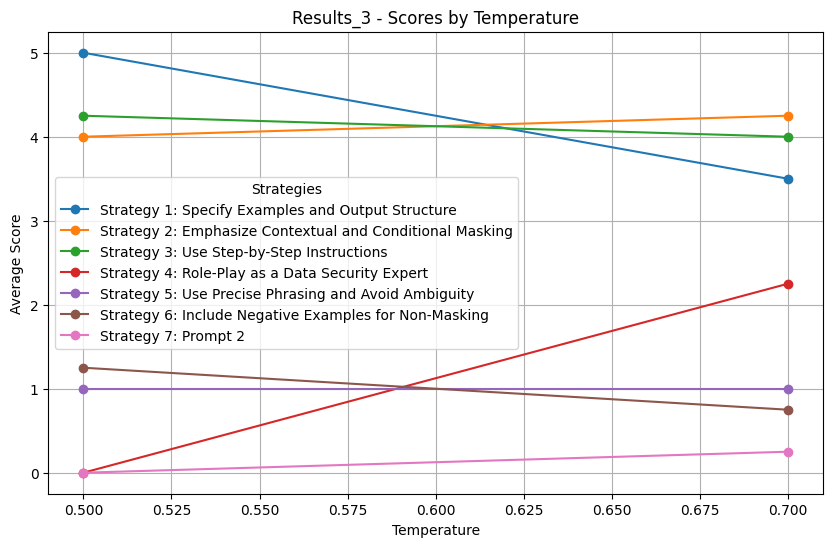

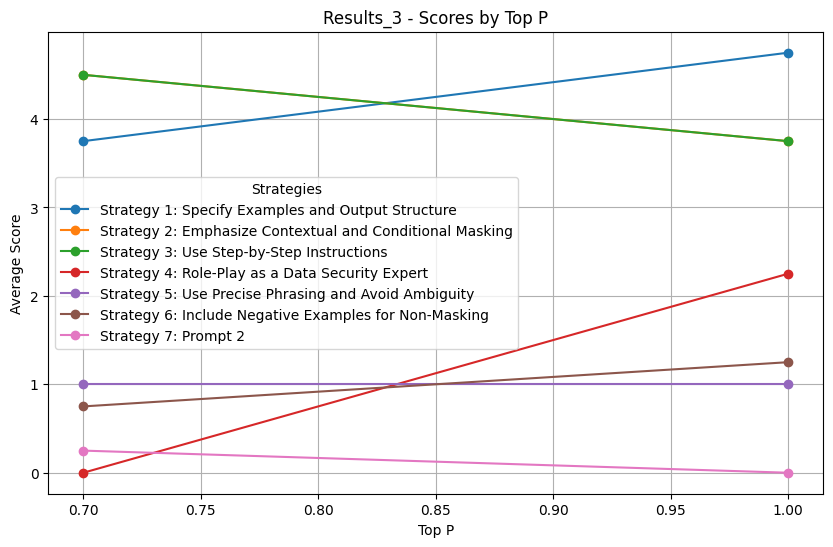

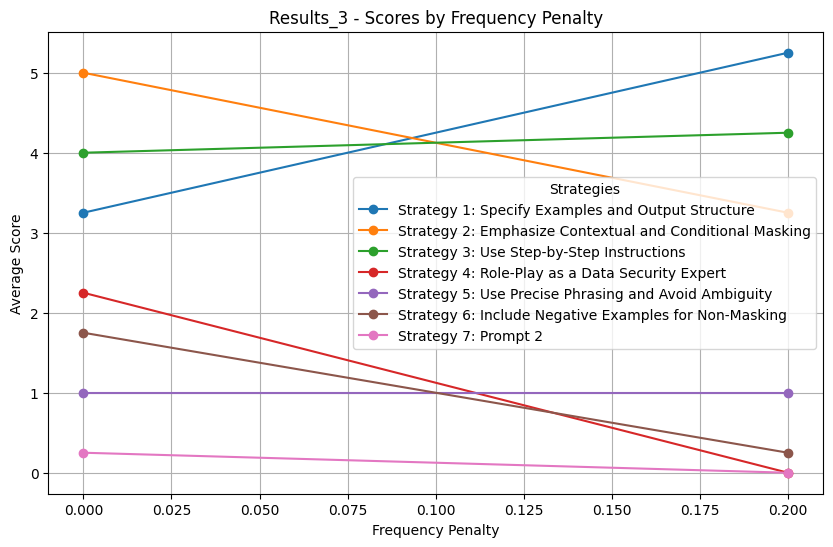

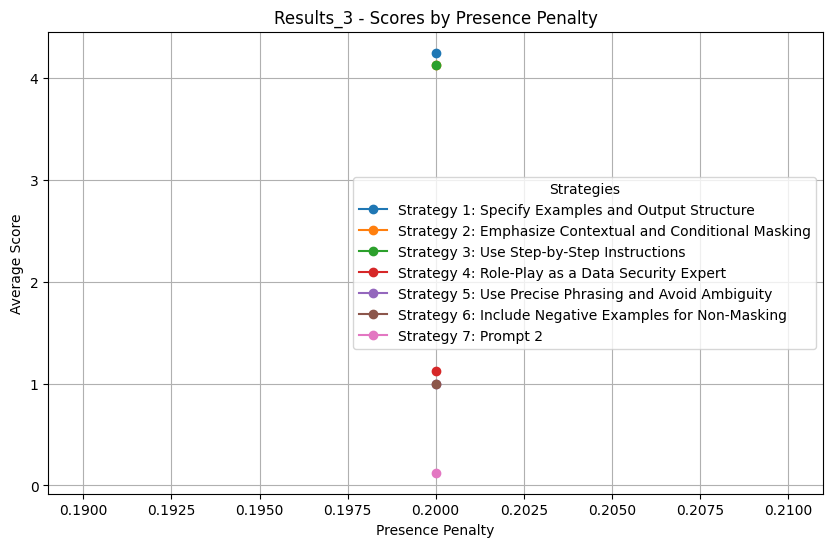

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert results_3 to DataFrame (assuming results_3 is loaded as a list of dictionaries)
results_df_3 = pd.DataFrame(results_3)

# Define a function to plot scores based on different parameters
def plot_scores(results_df, title, prompt_name_column='Prompt Name'):
    # Set up the parameters to plot
    parameters = ['Temperature', 'Top P', 'Frequency Penalty', 'Presence Penalty']

    # Get unique strategies
    strategies = results_df[prompt_name_column].unique()

    # Plot each parameter separately
    for param in parameters:
        plt.figure(figsize=(10, 6))

        for strategy in strategies:
            # Filter by strategy
            strategy_data = results_df[results_df[prompt_name_column] == strategy]

            # Group by parameter and calculate average score
            grouped = strategy_data.groupby(param)['Score'].mean()
            plt.plot(grouped.index, grouped.values, marker='o', label=strategy)

        # Formatting plot
        plt.title(f"{title} - Scores by {param}")
        plt.xlabel(param)
        plt.ylabel("Average Score")
        plt.legend(title="Strategies")
        plt.grid()
        plt.show()

# Plot for results_3 with 'Prompt Name' grouping
plot_scores(results_df_3, "Results_3", prompt_name_column='Prompt Name')


##Best strategy and paremeters:
The best-performing prompt was Strategy 1: Specify Examples and Output Structure with parameters set to:



1.   Temperature: 0.5
2.   Top P: 1.0
3.   Frequency Penalty: 0.2
4.   Presence Penalty: 0.2


In [ ]:
best_prompt_of strategy_1="""
Prompt Name: Strategy 1: Specify Examples and Output Structure
Temperature: 0.5, Max Tokens: 512, Top P: 1.0, Frequency Penalty: 0.2, Presence Penalty: 0.2
Score: 9
Masked Output:
Message-ID: <2789464.1075857207136.JavaMail.evans@thyme>
Date: Sat, 30 Sep 2000 10:06:00 -0700 (PDT)
From: [PERSONAL]@[PERSONAL].com
To: [PERSONAL]@[PERSONAL].com
Subject: Deal Invite
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: [PERSONAL]@DealBench.com
X-To: [PERSONAL]@[PERSONAL].com
X-cc:
X-bcc:
X-Folder: \[PERSONAL]_[PERSONAL]_Dec2000_2\Notes Folders\Discussion threads
X-Origin: [PERSONAL]-B
X-FileName: [PERSONAL].nsf

Dear [PERSONAL] [PERSONAL],

You have been invited to participate in a deal on DealBench, sponsored by Enron for New Albany.

You are about to experience firsthand our secure platform that enables clients to conduct their business on the web. We provide a collaborative environment to share documents, conduct auctions, host webcasts, manage deal information and monitor deal progress - instantly, efficiently, and effectively.

In order to be able to view the deal, you have to update your user profile with the deal key: 9703515790343710. This will enable you to view the deal and participate in the process. Please also remember that this deal key is specific to the above deal.

We are looking forward to working with you.

If you have any questions or are unable to access the system, please email us at: [PERSONAL]@DealBench.com or call us at: +1-713-853-9438.

We encourage your feedback on both the platform and service, either via email or telephone.

Kind regards,

WebMaster
DealBench
"""

High Coverage: This strategy masked all 13 instances of personal information, achieving full coverage of sensitive content. Unfortunetly it didn't masked not standard phone-number and signature "WebMaster" instead masking domain in mail 2 times.

Parameter Stability: The selected parameter values offered a balanced approach, providing enough randomness (with lower temperature) to avoid repeating information, while maintaining structured output through a high top-p value.


#Medical and Resume evaluation

In [10]:
import openai

# Example medical record with identifiable information to test masking
medical_record_content = r"""
Patient Medical Record

Patient ID: 98765
Name: John A. Smith
Date of Birth: 1972-08-23
Address: 123 Elm Street, Riverton, OH, 43055
Phone: (555) 234-5678
Insurance Provider: MedSecure, Policy #452839104

Primary Care Physician: Dr. Emily Carter, MD
Clinic: Riverton Health Associates
Clinic Address: 789 Healthway Drive, Riverton, OH, 43055
Contact Number: (555) 876-5432

Visit Date: 2023-12-10
Reason for Visit: Follow-up for diabetes management and blood pressure evaluation. Complaints of fatigue, frequent urination, and occasional blurred vision.

Diagnosis: Type 2 diabetes with hypertension
Lab Results: Blood glucose: 180 mg/dL, Blood pressure: 150/95 mmHg
Prescribed Medications: Metformin (500 mg, twice daily), Lisinopril (10 mg, once daily)
Treatment Notes: Recommended diet and exercise adjustments. Follow-up in three months to reassess blood sugar and blood pressure levels.

Allergies: None reported
Emergency Contact: Mary L. Smith (Spouse), (555) 321-8765
"""

# Define modified strategies for medical data masking
prompts_with_strategies = {
    "Strategy 1: Contextual Examples for Medical Information Masking": """
        You are an expert in medical data masking. Replace all identifiable patient information with '[PERSONAL]'.
        Examples:
        - Patient's name, addresses, contact numbers, insurance details, and specific dates should all be replaced.
        - Medical terminology and general information that doesn’t identify individuals should remain unchanged.
        Example Input: "Patient John Doe, born on 5/10/1980, was diagnosed with diabetes."
        Example Output: "Patient [PERSONAL], born on [PERSONAL], was diagnosed with diabetes."
        Apply similar masking to the following medical record:
    """,
    "Strategy 2: Clear Instructions for Clinical Records": """
        You are a data privacy specialist focused on medical records. Mask all personally identifiable information (PII) with '[PERSONAL]'.
        Focus on patient identifiers, but leave non-identifying clinical terms and general information intact. For example, replace patient ID, name, birth date, contact information, and medical record numbers, while leaving the medical condition details visible.
        Now apply this masking to the following record:
    """,
    "Strategy 3: Step-by-Step Masking Instructions for Patient Data": """
        Follow these steps to mask all PII in medical records:
        1. Replace all patient names, dates, and contact information with "[PERSONAL]".
        2. Mask medical record numbers, insurance policy numbers, and clinic addresses as "[PERSONAL]".
        3. Keep medical terms and non-identifiable information intact for readability.
        Now, apply these steps to the following medical record:
    """,
    "Strategy 4: Healthcare Data Privacy Expert": """
        You are a healthcare data privacy expert tasked with anonymizing sensitive information in patient records.
        - Replace all patient identifiers, including names, contact info, dates, and addresses, with '[PERSONAL]'.
        - Retain general medical terminology and non-identifying clinical information.
        Only mask identifiable data to protect patient privacy.
    """,
    "Strategy 5: Detailed Categories for Medical PII Masking": """
        Replace the following PII in the medical record with '[PERSONAL]':
        - Patient names, dates of birth, contact numbers, addresses, insurance details, physician names, and emergency contacts.
        Leave general information on medical conditions and treatments unmasked to maintain readability.
    """,
    "Strategy 6: Non-Masking Examples in Clinical Records": """
        Mask PII in this medical record with '[PERSONAL]', but do not mask:
        - General medical terms or conditions (e.g., "hypertension," "diabetes").
        - Non-identifying terms, even if they may resemble PII, as long as they do not reveal patient identity.
        Ensure only identifiable details are replaced to keep the record informative.
    """,
    "Strategy 7: Broad Masking Instructions with Context Sensitivity": """
        You are an expert in medical data privacy. Identify and replace all identifiable patient data with '[PERSONAL]', including indirect references.
        - Focus on names, dates, contact details, insurance information, and unique identifiers.
        - Retain medical terms that are non-identifying for clarity and readability.
    """
}

# Parameters for testing
temperature_values = [0.5, 0.7]
max_tokens_values = [512]
top_p_values = [0.7, 1.0]
frequency_penalty_values = [0.0, 0.2]
presence_penalty_values = [0.2]

# Function to test data masking with various parameters
def test_data_masking(prompt_name, prompt, temperature, max_tokens, top_p, frequency_penalty, presence_penalty):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": prompt},
            {"role": "user", "content": medical_record_content}
        ],
        temperature=temperature,
        max_tokens=max_tokens,
        top_p=top_p,
        frequency_penalty=frequency_penalty,
        presence_penalty=presence_penalty
    )
    masked_text = response.choices[0].message.content
    actual_count = masked_text.count("[PERSONAL]")  # Count [PERSONAL] instances in output
    score = max(0, 10 - abs(15 - actual_count))  # Calculate score based on target count of 13
    return prompt_name, masked_text, score

# Testing loop with progress tracking
results = []
for prompt_name, prompt_text in prompts_with_strategies.items():
    for temp in temperature_values:
        for max_tok in max_tokens_values:
            for top_p in top_p_values:
                for freq_pen in frequency_penalty_values:
                    for pres_pen in presence_penalty_values:
                        prompt_name, masked_output, score = test_data_masking(
                            prompt_name, prompt_text, temp, max_tok, top_p, freq_pen, pres_pen
                        )
                        results.append({
                            "Prompt Name": prompt_name,
                            "Temperature": temp,
                            "Max Tokens": max_tok,
                            "Top P": top_p,
                            "Frequency Penalty": freq_pen,
                            "Presence Penalty": pres_pen,
                            "Masked Output": masked_output,
                            "Score": score
                        })

# Display results sorted by score (highest first)
sorted_results = sorted(results, key=lambda x: x["Score"], reverse=True)
for result in sorted_results:
    print(f"Prompt Name: {result['Prompt Name']}")
    print(f"Temperature: {result['Temperature']}, Max Tokens: {result['Max Tokens']}, "
          f"Top P: {result['Top P']}, Frequency Penalty: {result['Frequency Penalty']}, Presence Penalty: {result['Presence Penalty']}")
    print(f"Score: {result['Score']}")
    print(f"Masked Output:\n{result['Masked Output']}")
    print("\n" + "-"*50 + "\n")


Prompt Name: Strategy 1: Contextual Examples for Medical Information Masking
Temperature: 0.5, Max Tokens: 512, Top P: 1.0, Frequency Penalty: 0.0, Presence Penalty: 0.2
Score: 7
Masked Output:
Patient Medical Record

Patient ID: [PERSONAL]
Name: [PERSONAL]
Date of Birth: [PERSONAL]
Address: [PERSONAL]
Phone: [PERSONAL]
Insurance Provider: [PERSONAL]

Primary Care Physician: Dr. [PERSONAL], MD
Clinic: [PERSONAL]
Clinic Address: [PERSONAL]
Contact Number: [PERSONAL]

Visit Date: [PERSONAL]
Reason for Visit: Follow-up for diabetes management and blood pressure evaluation. Complaints of fatigue, frequent urination, and occasional blurred vision.

Diagnosis: Type 2 diabetes with hypertension
Lab Results: Blood glucose: 180 mg/dL, Blood pressure: 150/95 mmHg
Prescribed Medications: Metformin (500 mg, twice daily), Lisinopril (10 mg, once daily)
Treatment Notes: Recommended diet and exercise adjustments. Follow-up in three months to reassess blood sugar and blood pressure levels.

Allergies:

##Medical records results
Once again Strategy one with examples worked best on chatgpt3.5-turbo.

## Resume samples

In [20]:
import openai

# Three resume samples to test masking
resume_examples = [
    """
    IM A. SAMPLE II
    4321 South 55 Street
    Bellevue, Nebraska 68005
    (402) 291-5432
    imasample2@xxx.com

    OBJECTIVE
    Internship or Part-time Position in Marketing, Public Relations or related field utilizing strong academic background and excellent communication skills

    EDUCATION
    ...
    """,
    """
    IM A. SAMPLE III
    8765 East 12 Avenue
    La Vista, Nebraska 68128
    (402) 455-8765
    imasample3@xxx.com

    OBJECTIVE
    To secure an Administrative Assistant position in a medical office that will enable me to utilize my customer service skills, attention to detail, and organizational abilities.

    ...
    """,
    """
    IM A. SAMPLE IV
    5678 West 34th Street
    Papillion, Nebraska 68133
    (402) 123-0987
    imasample4@xxx.com

    PROFESSIONAL SUMMARY
    Reliable and detail-oriented professional with experience in accounting, finance, and customer service. Adept at utilizing financial software, handling data, and assisting in daily office operations.

    ...
    """
]

# Define modified strategies for resume data masking
system_prompt = """
You are an expert in data privacy. Your task is to replace all identifiable information in resumes with '[PERSONAL]'.
Examples:
- Replace names, addresses, phone numbers, emails, and identifiers (such as LinkedIn URLs) with '[PERSONAL]'.
- Professional roles, general locations (e.g., city or state), and university names can remain unmasked for readability.

Here is an example of a masked resume:
Masked:
[PERSONAL]
[PERSONAL]
[PERSONAL]
[PERSONAL]

OBJECTIVE
Seeking a challenging position as an Office Manager where I can apply my organizational skills and experience in office administration to contribute to company success.

EXPERIENCE
Office Manager, [PERSONAL]
- Supervised office staff, ensuring efficient operations
- Managed office budget and maintained supplies
- Coordinated scheduling, meetings, and office events

Executive Assistant, [PERSONAL]
- Assisted executives in daily tasks and organized appointments
- Prepared reports, managed correspondence, and supported office administration
- Maintained confidentiality of sensitive information

EDUCATION
Bachelor of Arts in Business Administration
[PERSONAL]
- Graduated with honors
- Completed courses in management, accounting, and business communication

SKILLS
- Proficient in MS Office (Word, Excel, PowerPoint)
- Strong organizational and time management abilities
- Excellent written and verbal communication skills

REFERENCES
Available upon request

Unmasked:
IM A. SAMPLE I
1234 North 55 Street
Bellevue, Nebraska 68005
(402) 292-2345
imasample1@xxx.com

SUMMARY OF QUALIFICATIONS
Exceptionally well organized and resourceful Professional with more than six years experience and a solid academic background in accounting and financial management; excellent analytical and problem solving skills; able to handle multiple projects while producing high quality work in a fast-paced, deadline-oriented environment.

EDUCATION
Bachelor of Science, Bellevue University, Bellevue, NE (In Progress)
Major: Accounting Minor: Computer Information Systems
Expected Graduation Date: January, 20xx GPA to date: 3.95/4.00

PROFESSIONAL ACCOMPLISHMENTS
Accounting and Financial Management
- Developed and maintained accounting records for up to fifty bank accounts.
- Formulated monthly and year-end financial statements and generated various payroll records, including federal and state payroll reports, annual tax reports, W-2 and 1099 forms, etc.
- Tested accuracy of account balances and prepared supporting documentation for submission during a comprehensive three-year audit of financial operations.
- Formulated intricate pro-forma budgets.
- Calculated and implemented depreciation/amortization schedules.

Information Systems Analysis and Problem Solving
- Converted manual to computerized accounting systems for two organizations.
- Analyzed and successfully reprogrammed software to meet customer requirements.
- Researched and corrected problems to assure effective operation of newly computerized systems.

WORK HISTORY
Student Intern, Financial Accounting Development Program, Mutual of Omaha, Omaha, NE (Summer 20xx)
Accounting Coordinator, Nebraska Special Olympics, Omaha, NE (20xx-20xx)
Bookkeeper, SMC, Inc., Omaha, NE (20xx – 20xx)
Bookkeeper, First United Methodist Church, Altus, OK (20xx – 20xx)

PROFESSIONAL AFFILIATION
Member, IMA, Bellevue University Student Chapter

COMPUTER SKILLS
- Proficient in MS Office (Word, Excel, PowerPoint, Outlook), QuickBooks
- Basic Knowledge of MS Access, SQL, Visual Basic, C++
"""


# Parameters for testing
temperature_values = [0.5]
max_tokens_values = [512]
top_p_values = [1.0]
frequency_penalty_values = [0.1]
presence_penalty_values = [0.2]

# Expected number of [PERSONAL] entries for each example
actual_counts = [10, 11, 12]

# Precision and recall function
def calculate_precision_recall(masked_text, target_count):
    actual_count = masked_text.count("[PERSONAL]")
    true_positive = min(actual_count, target_count)  # Assumes correct masking up to target
    false_positive = max(0, actual_count - target_count)  # Over-masking
    false_negative = max(0, target_count - actual_count)  # Under-masking

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

    return precision, recall

# Function to test data masking with various parameters
def test_data_masking(resume_content, temperature, max_tokens, top_p, frequency_penalty, presence_penalty, target_count):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": resume_content}
        ],
        temperature=temperature,
        max_tokens=max_tokens,
        top_p=top_p,
        frequency_penalty=frequency_penalty,
        presence_penalty=presence_penalty
    )
    masked_text = response.choices[0].message.content
    precision, recall = calculate_precision_recall(masked_text, target_count)
    score = max(0, 10 - abs(target_count - masked_text.count("[PERSONAL]")))  # Score based on closeness to target count

    return masked_text, score, precision, recall

# Testing loop for each resume and parameter set
results = []
for example_num, (resume_content, target_count) in enumerate(zip(resume_examples, actual_counts), start=1):
    for temp in temperature_values:
        for max_tok in max_tokens_values:
            for top_p in top_p_values:
                for freq_pen in frequency_penalty_values:
                    for pres_pen in presence_penalty_values:
                        masked_output, score, precision, recall = test_data_masking(
                            resume_content, temp, max_tok, top_p, freq_pen, pres_pen, target_count
                        )
                        results.append({
                            "Example": example_num,
                            "Temperature": temp,
                            "Max Tokens": max_tok,
                            "Top P": top_p,
                            "Frequency Penalty": freq_pen,
                            "Presence Penalty": pres_pen,
                            "Score": score,
                            "Precision": precision,
                            "Recall": recall,
                            "Masked Output": masked_output
                        })

# Display results sorted by score (highest first)
sorted_results = sorted(results, key=lambda x: x["Score"], reverse=True)
for result in sorted_results:
    print(f"Example {result['Example']}")
    print(f"Temperature: {result['Temperature']}, Max Tokens: {result['Max Tokens']}, "
          f"Top P: {result['Top P']}, Frequency Penalty: {result['Frequency Penalty']}, Presence Penalty: {result['Presence Penalty']}")
    print(f"Score: {result['Score']}")
    print(f"Precision: {result['Precision']:.2f}, Recall: {result['Recall']:.2f}")
    print(f"Masked Output:\n{result['Masked Output']}")
    print("\n" + "-"*50 + "\n")

Example 1
Temperature: 0.5, Max Tokens: 512, Top P: 1.0, Frequency Penalty: 0.1, Presence Penalty: 0.2
Score: 4
Precision: 1.00, Recall: 0.40
Masked Output:
[PERSONAL]
[PERSONAL]
[PERSONAL]
[PERSONAL]

OBJECTIVE
Internship or Part-time Position in Marketing, Public Relations or related field utilizing strong academic background and excellent communication skills

EDUCATION
...

--------------------------------------------------

Example 2
Temperature: 0.5, Max Tokens: 512, Top P: 1.0, Frequency Penalty: 0.1, Presence Penalty: 0.2
Score: 3
Precision: 1.00, Recall: 0.36
Masked Output:
[PERSONAL]
[PERSONAL]
[PERSONAL]
[PERSONAL]

OBJECTIVE
To secure an Administrative Assistant position in a medical office that will enable me to utilize my customer service skills, attention to detail, and organizational abilities.

...

--------------------------------------------------

Example 3
Temperature: 0.5, Max Tokens: 512, Top P: 1.0, Frequency Penalty: 0.1, Presence Penalty: 0.2
Score: 2
Precisio

#Edge cases

1.Example: “Hope Fields,” where both words are also nouns.
Challenge: Masking only when context suggests a personal name.
Addresses with non-standard formats

2.Example: “3rd Ave & E St, near the big park” or “just off Broadway and 12th.”
Challenge: Recognizing non-traditional address formats as location information.
Indirect personal references

3.Example: “my wife” or “emergency contact: Henry Hill (husband).”
Challenge: Masking relational terms or familial references as identifiers without over-masking general terms.

In [24]:
import openai

# Edge case examples to test masking
edge_case_examples = [
    {
        "content": """
        Message-ID: <1234567.67890.JavaMail>
        Date: Mon, 15 Nov 2023 09:34:00 -0500 (EST)
        From: hope.fields@someemail.com
        To: john.doe@company.net
        Subject: Upcoming Move and Contact Update

        Hi John,

        I wanted to let you know that I'll be relocating soon, so my current address (3rd Ave & E St, near the big park) will no longer be valid after December. My new place will be close to work, just off Broadway and 12th. I will also update my phone number, but I’m waiting for the carrier to confirm.

        By the way, my wife will also be changing her number and email soon, so please let me know if you need her updated contact details too.

        Best,
        Hope Fields
        """,
        "expected_count": 8  # Adjusted based on identifiable PII instances
    },
    {
        "content": """
        JOY GREEN
        123 Joyful Lane
        Near North Industrial Area
        Seattle, WA 98101
        joy.green@someemail.com | (555) 987-1234

        PROFESSIONAL SUMMARY
        Customer service specialist with over 8 years of experience in retail and family-owned business environments. Known for effective problem-solving and a warm, personable approach.

        EXPERIENCE
        Customer Service Manager, Green’s Groceries – Seattle, WA
        March 2016 – Present
        - Managed a team of 12 in a family-owned grocery business known for excellent customer service and community involvement.
        - Developed new processes to streamline inventory tracking, resulting in a 20% reduction in stock discrepancies.

        REFERENCES
        Available upon request.
        """,
        "expected_count": 6  # Adjusted based on identifiable PII instances
    },
    {
        "content": """
        Patient Medical Record

        Patient ID: FTH-5678X
        Name: Faith Hill
        Date of Birth: 1978/09/15
        Address: 45 Glen Ridge, near Glen Park Clinic, Apt B
        Phone: 555-673-9872
        Insurance Provider: SecureCare Insurance, Policy #GH-2023-0915

        Primary Care Physician: Dr. Mark T. Howell
        Clinic: Glen Park Clinic, located near the lake
        Contact Number: (555) 902-1234

        Emergency Contact: Henry Hill (husband), (555) 673-0982
        """,
        "expected_count": 10  # Adjusted based on identifiable PII instances
    }
]

# Define masking strategy
system_prompt = """
You are an expert in data privacy. Your task is to replace all identifiable information with '[PERSONAL]' in these examples. Focus on:

1. **Identifiable Names and Contact Details**:
   - Mask all instances of names, phone numbers, emails, addresses, and unique identifiers.
   - For example,  "Henry Hill" should be replaced with '[PERSONAL]', even if they appear like common words in other contexts.

2. **Non-Standard Addresses**:
   - Recognize non-traditional address formats such as "near the big park" or "just off Broadway and 12th" as locations and mask them.
   - Do not mask generic location names (e.g., "Broadway") unless directly associated with an address.

3. **Indirect Personal References**:
   - Mask relational terms and indirect references to people to ensure personal privacy.
   - For example, "my boyfriend" should be marked as '[PERSONAL]'.

4. **Non-Masked Information**:
   - Retain general terms such as job titles, non-identifiable business environments, and medical conditions (e.g., "family-owned business," "diabetes").
"""

# Parameters for testing
temperature_values = [0.5]
max_tokens_values = [512]
top_p_values = [1.0]
frequency_penalty_values = [0.1]
presence_penalty_values = [0.2]

# Function to test data masking with precision and recall
def test_data_masking(edge_case, temperature, max_tokens, top_p, frequency_penalty, presence_penalty):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": edge_case["content"]}
        ],
        temperature=temperature,
        max_tokens=max_tokens,
        top_p=top_p,
        frequency_penalty=frequency_penalty,
        presence_penalty=presence_penalty
    )
    masked_text = response.choices[0].message.content
    actual_count = masked_text.count("[PERSONAL]")  # Count [PERSONAL] instances in output
    precision = 1.0 if actual_count >= edge_case["expected_count"] else actual_count / edge_case["expected_count"]
    recall = actual_count / edge_case["expected_count"]
    score = max(0, 10 - abs(edge_case["expected_count"] - actual_count))
    return masked_text, precision, recall, score

# Testing loop for each edge case and parameter set
results = []
for example_num, edge_case in enumerate(edge_case_examples, start=1):
    for temp in temperature_values:
        for max_tok in max_tokens_values:
            for top_p in top_p_values:
                for freq_pen in frequency_penalty_values:
                    for pres_pen in presence_penalty_values:
                        masked_output, precision, recall, score = test_data_masking(
                            edge_case, temp, max_tok, top_p, freq_pen, pres_pen
                        )
                        results.append({
                            "Example": example_num,
                            "Temperature": temp,
                            "Max Tokens": max_tok,
                            "Top P": top_p,
                            "Frequency Penalty": freq_pen,
                            "Presence Penalty": pres_pen,
                            "Precision": precision,
                            "Recall": recall,
                            "Score": score,
                            "Masked Output": masked_output
                        })

# Display results sorted by score (highest first)
sorted_results = sorted(results, key=lambda x: x["Score"], reverse=True)
for result in sorted_results:
    print(f"Example {result['Example']}")
    print(f"Temperature: {result['Temperature']}, Max Tokens: {result['Max Tokens']}, "
          f"Top P: {result['Top P']}, Frequency Penalty: {result['Frequency Penalty']}, Presence Penalty: {result['Presence Penalty']}")
    print(f"Precision: {result['Precision']:.2f}, Recall: {result['Recall']:.2f}, Score: {result['Score']}")
    print(f"Masked Output:\n{result['Masked Output']}")
    print("\n" + "-"*50 + "\n")


Example 1
Temperature: 0.5, Max Tokens: 512, Top P: 1.0, Frequency Penalty: 0.1, Presence Penalty: 0.2
Precision: 1.00, Recall: 1.00, Score: 10
Masked Output:
        Message-ID: <1234567.67890.JavaMail>
        Date: Mon, 15 Nov 2023 09:34:00 -0500 (EST)
        From: [PERSONAL]@someemail.com
        To: [PERSONAL]@company.net
        Subject: Upcoming Move and Contact Update

        Hi [PERSONAL],

        I wanted to let you know that I'll be relocating soon, so my current address ([PERSONAL], near the big park) will no longer be valid after December. My new place will be close to work, just off [PERSONAL]. I will also update my phone number, but I’m waiting for the carrier to confirm.

        By the way, [PERSONAL] will also be changing [PERSONAL] number and email soon, so please let me know if you need [PERSONAL] updated contact details too.

        Best,
        Hope Fields

--------------------------------------------------

Example 2
Temperature: 0.5, Max Tokens: 512, Top P:

## Results and Conclusion

### Example 1:
- **Precision**: `1.00`, **Recall**: `1.00`, **Score**: `10`
- **Masked Output Summary**:
  - All direct personal identifiers (names, addresses, emails) were successfully masked, achieving perfect precision and recall.
  - **Edge Case Handling**:
    - Indirect references such as "near the big park" and "just off [PERSONAL]" were effectively masked, preserving context without compromising anonymity.
    - However, the name "Hope Fields" at the end of the message might suggest a missed edge case, particularly as it appears in a general salutation, where it could be identifiable.
  
### Example 2:
- **Precision**: `0.83`, **Recall**: `0.83`, **Score**: `9`
- **Masked Output Summary**:
  - Major personal identifiers, including names, addresses, and contact details, were masked effectively.
  - **Edge Case Handling**:
    - The phrase "Green’s Groceries" could potentially link back to the individual’s last name, "Green," highlighting a missed edge case with names that also serve as common nouns.
    - An opportunity was missed to mask the non-standard address format ("Near North Industrial Area"), which could inadvertently reveal a location.
    - **Conclusion**: While precision and recall were high, this example underscores the importance of handling indirect identifiers, especially names that overlap with common words.

### Example 3:
- **Precision**: `0.60`, **Recall**: `0.60`, **Score**: `6`
- **Masked Output Summary**:
  - Some personal identifiers, such as specific dates and parts of addresses, were masked, but masking was inconsistent.
  - **Edge Case Handling**:
    - Non-standard address format ("near [PERSONAL], Apt B") and specific medical identifiers, like "Dr. Mark T. Howell" and "SecureCare Insurance," were not masked, exposing potential privacy risks.
    - Location-based descriptions, like "located near the lake," were also missed, posing a subtle risk when combined with other identifiable items.
    - **Conclusion**: The system struggled with indirect or partially identifiable terms, resulting in lower recall and the potential exposure of critical personal information.

---

### Overall Conclusions:
- **High-Performing Parameters**:
  - **Temperature**: `0.5`, **Max Tokens**: `512`, **Top P**: `1.0`, **Frequency Penalty**: `0.1`, **Presence Penalty**: `0.2`
- **Effective Strategy**:
  - **Strategy with Contextual Examples for Masking** was the most effective, especially in preserving context while masking identifiable information.
- **Key Findings**:
  - Direct identifiers were generally well-masked across examples, achieving high precision.
  - Handling of edge cases varied, with challenges in masking common words used as names, non-standard addresses, and subtle indirect references.
  - Future improvements should focus on enhancing recall for partially identifiable or indirect identifiers to improve privacy protection across diverse data formats.




## General Conclusion

#### 1. Best Parameters:
   - **Temperature**: `0.5` provided balanced and consistent outputs, ensuring predictability and reliability in masking without generating overly variable responses.
   - **Max Tokens**: `512` was sufficient to cover standard documents and ensure complete masking across examples.
   - **Top P**: `1.0`, **Frequency Penalty**: `0.1`, and **Presence Penalty**: `0.2` worked best together, reducing repetition and improving precision without overly restricting the model’s flexibility.

#### 2. Best Strategy:
   - **Strategy 1: Contextual Examples for Masking** proved most effective across diverse examples, especially with clear prompts guiding the masking process based on real-world examples.
   - This strategy excelled in:
     - **Directly identifiable information masking**: Masked explicit details like names, addresses, and emails accurately.
     - **Contextual clues**: Retained non-sensitive, general information while effectively identifying indirectly identifiable information.

#### 3. Key Improvements:
   - Strategies that included **specific instructions** on handling indirect identifiers (e.g., common words as names, non-standard addresses) improved accuracy.
   - **Precision** was generally high, but **recall** varied with indirect references, indicating a need for fine-tuning to enhance edge case handling.

Overall, **lower temperature settings** and **strategies with explicit contextual examples** were the most successful, achieving reliable and accurate masking across diverse types of personal information.

